In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras import optimizers
from scipy.io import savemat, loadmat
from DNN_Net2 import DNN_Net2 as DNN_Net
from data_prep2 import river_data_prep as rdp
import timeit

Using TensorFlow backend.


In [2]:
data = loadmat('american_river.mat')
prof_vel = data['velocity_prof']
prof_dep = data['z_prof']

In [3]:
n_edge = 11
nx = [2001, 51]
params_rdp = {'nx': nx, 'prof_vel': prof_vel, 'prof_dep': prof_dep,
              'n_edge': n_edge, 'shuffle': True, 'seed_num': 101, 'divide_domain': False, 'mirror': False,
              'pca': True, 'n_pc': 41, 'len_scale': [40, 50], 'kernel': 'Gaussian',
              'xmin': [0, 0], 'dx': [5, 5], 'size_dom': [n_edge, nx[1]]}


In [4]:
model_data = rdp(params_rdp)

In [5]:
X_train, Y_train = model_data.Gen_train_data()

In [6]:
param = {}
n_layer = 9
n_hidden = [900, 800, 800, 500, 400, 200, 100, 70, 41]
np.random.seed(101)
n_epoch_ = 30
#sgd = optimizers.SGD(lr=0.0006, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(lr=0.00008, beta_1=0.9, beta_2=0.999, epsilon=None, decay=2e-6, amsgrad=False)

optimizer = adam


In [7]:
start = timeit.default_timer()
network = DNN_Net(X_train, Y_train, n_layer, n_hidden, n_epoch=n_epoch_, Normalize=True, optimizer_meth=optimizer,
                  method='batchnorm', act_fcn='tanh', reg=0.01, batch_s=512)
run_time = timeit.default_timer() - start

Train on 159280 samples, validate on 39820 samples
Epoch 1/30
159280/159280 [==============================] - 39s 242us/step - loss: 29.3001 - mean_squared_error: 0.5080 - val_loss: 21.5775 - val_mean_squared_error: 0.6049
Epoch 2/30
159280/159280 [==============================] - 37s 231us/step - loss: 16.8280 - mean_squared_error: 0.3303 - val_loss: 13.7883 - val_mean_squared_error: 0.8554
Epoch 3/30
159280/159280 [==============================] - 36s 226us/step - loss: 10.9547 - mean_squared_error: 0.2754 - val_loss: 9.6140 - val_mean_squared_error: 0.8210
Epoch 4/30
159280/159280 [==============================] - 37s 233us/step - loss: 7.7363 - mean_squared_error: 0.2462 - val_loss: 7.0289 - val_mean_squared_error: 0.6683
Epoch 5/30
159280/159280 [==============================] - 36s 227us/step - loss: 5.7545 - mean_squared_error: 0.2250 - val_loss: 5.6213 - val_mean_squared_error: 0.8312
Epoch 6/30
159280/159280 [==============================] - 37s 234us/step - loss: 4.4471

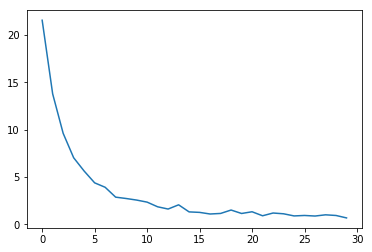

In [8]:
plt.plot(network.history.history['val_loss'])

In [9]:
data_red_river = loadmat('american_river_true.mat')
vel_red = data_red_river['true_vel']
prof_red = data_red_river['true_profile']

In [10]:
X, Y = model_data.gen_test_data(vel=vel_red.reshape(-1, 1), dep=prof_red.reshape(-1, 1))

In [11]:
bathy_dnn = network.predict(X)
pred_river = model_data.post_process(bathy_dnn)

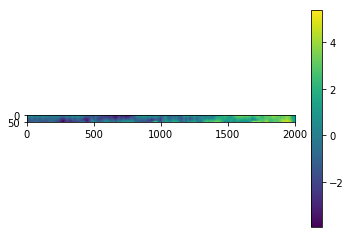

In [17]:
pred_river = pred_river.reshape(51,2001)
plt.imshow(pred_river)
plt.colorbar()

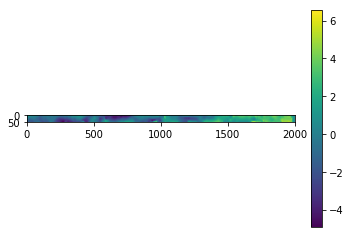

In [18]:
prof_red = prof_red.reshape(51,2001)
plt.imshow(prof_red)
plt.colorbar()

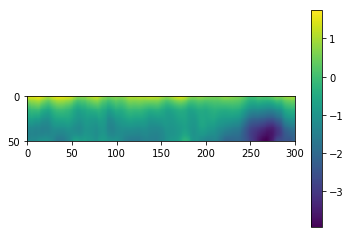

In [23]:
plt.imshow(pred_river[:,:300])
plt.colorbar()

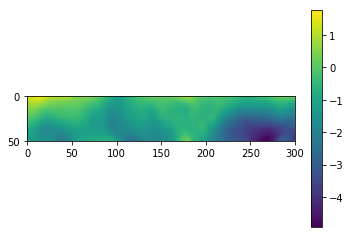

In [24]:
plt.imshow(prof_red[:,:300])
plt.colorbar()

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(prof_red, pred_river))
rmse

0.7007580821691798